In [1]:
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  features_X = np.concatenate((np.ones((features_X.shape[0], 1)), features_X), axis=1)


  return features_X, sales_Y


In [2]:
features_X, _ = load_data_from_file()

In [3]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
  return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  individual = [generate_random_value() for _ in range(n)]

  return individual

In [5]:
individual = create_individual()
print(individual)

[4.423018595755488, 2.0441281825145285, -0.24814105196761416, 2.259274668866719]


In [6]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    fitness = 1 / (compute_loss(individual) + 1)

    return fitness

In [7]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() <= crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

In [8]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    individual_m = [generate_random_value() if random.random() <= mutation_rate else gene for gene in individual]
    
    return individual_m

In [9]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [10]:
population = initializePopulation(100)
print(len(population))

100


In [11]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index2] if index2 > index1 else sorted_old_population[index1]

    return individual_s

In [12]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-4.074380298983494, 4.8907285672538015, -2.1189373768940256, -3.8622324047070586]


In [13]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        selected_promosome1 = selection(sorted_population, m)
        selected_promosome2 = selection(sorted_population, m)


        # crossover
        crossover_promosome1, crossover_promosome2 = crossover(selected_promosome1, selected_promosome2)

        # mutation

        mutated_promosome1 = mutate(crossover_promosome1)
        mutated_promosome2 = mutate(crossover_promosome2)
        
        new_population.append(mutated_promosome1)
        new_population.append(mutated_promosome2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [14]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    population, loss = create_new_population(population)
    losses_list.append(loss)

  return losses_list, population


In [15]:
losses_list, population = run_GA()

Best loss: 555.8036694240697 with chromsome:  [3.193952341639629, -0.12977257666905162, 0.8269904217023261, -0.09619543666557817]
Best loss: 555.8036694240697 with chromsome:  [3.193952341639629, -0.12977257666905162, 0.8269904217023261, -0.09619543666557817]
Best loss: 516.5012018950158 with chromsome:  [4.5958354699564214, -0.12977257666905162, 0.8269904217023261, -0.09619543666557817]
Best loss: 516.5012018950158 with chromsome:  [4.5958354699564214, -0.12977257666905162, 0.8269904217023261, -0.09619543666557817]
Best loss: 115.11820829465404 with chromsome:  [-0.7571427939615782, 0.03127354731559562, 0.8522831054588786, -0.24314349088725096]
Best loss: 115.11820829465404 with chromsome:  [-0.7571427939615782, 0.03127354731559562, 0.8522831054588786, -0.24314349088725096]
Best loss: 26.334065495246122 with chromsome:  [0.8297632739107919, 0.09925421081006358, 0.2076918070149414, -0.09619543666557817]
Best loss: 26.334065495246122 with chromsome:  [0.8297632739107919, 0.0992542108100

Best loss: 626.0364109967305 with chromsome:  [3.487925545296674, 0.14886959756003515, -1.0380823959738439, 0.852922518375766]
Best loss: 626.0364109967305 with chromsome:  [3.487925545296674, 0.14886959756003515, -1.0380823959738439, 0.852922518375766]
Best loss: 536.624217791528 with chromsome:  [-3.4835899524895586, 0.14886959756003515, -1.0380823959738439, 0.19240270234388013]
Best loss: 389.5698653642555 with chromsome:  [2.6910783258765933, 0.14886959756003515, -1.0380823959738439, 0.19240270234388013]
Best loss: 359.9120862434 with chromsome:  [-3.425544771602137, -0.03598884383732792, 1.2851086068851325, -0.38711686586650695]
Best loss: 359.9120862434 with chromsome:  [-3.425544771602137, -0.03598884383732792, 1.2851086068851325, -0.38711686586650695]
Best loss: 278.91629192696064 with chromsome:  [1.5529852735512284, 0.01600668824265905, -0.4160099356414715, 0.21161200597496377]
Best loss: 113.25791222168677 with chromsome:  [3.487925545296674, -0.03598884383732792, 0.23242876

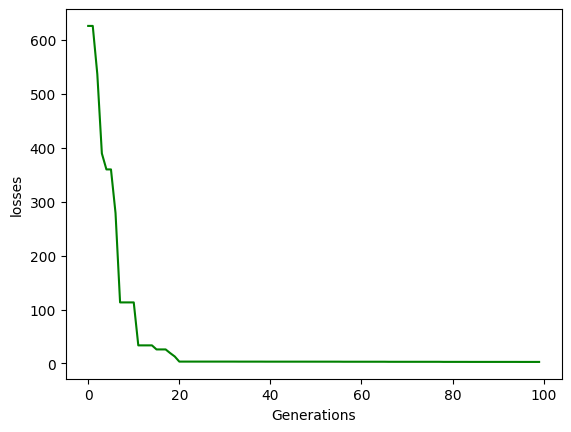

In [16]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      plt.plot(losses_list, c='green')
      plt.xlabel('Generations')
      plt.ylabel('losses')


losses_list, population = run_GA()
visualize_loss(losses_list)

[3.645241872088599, 0.0574278508225623, 0.1064351680573894, 0.014161817346225458]


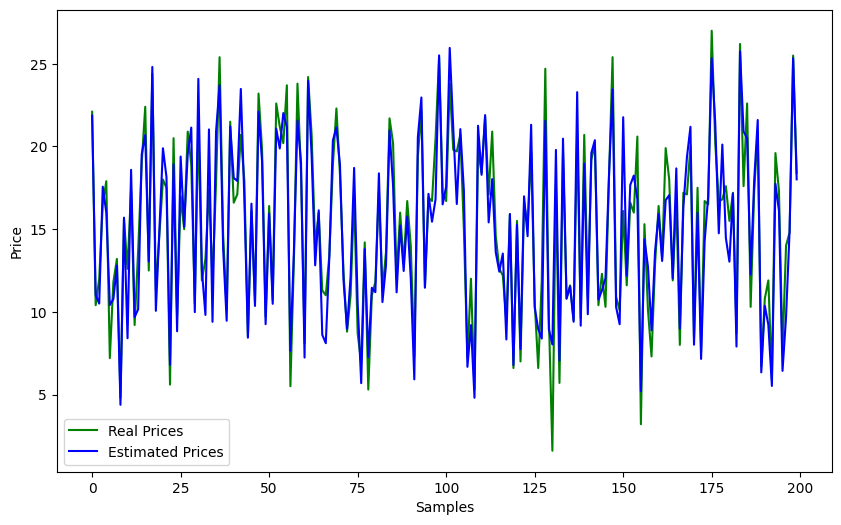

In [17]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_prices.append(sum(c*x for x, c in zip(feature, theta)))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[3.645241872088599, 0.0574278508225623, 0.1064351680573894, 0.014161817346225458]


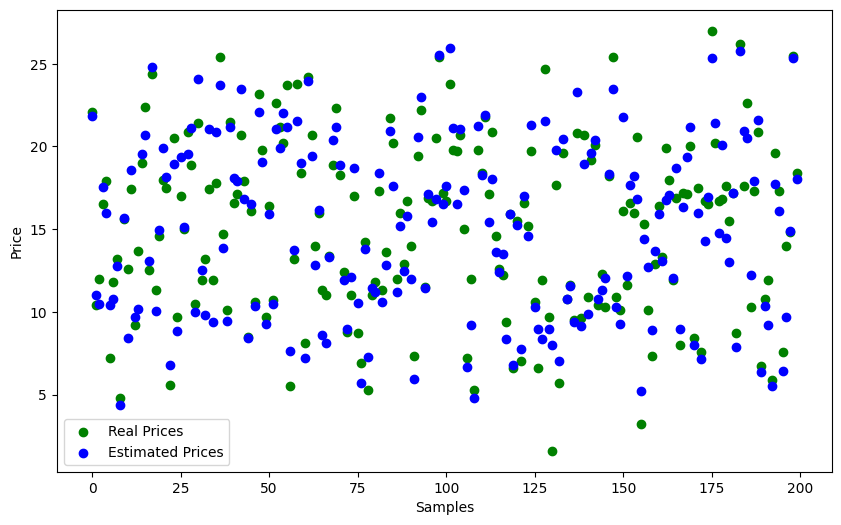

In [18]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()